In [3]:
# Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# Exploración y Transformación

In [4]:
#Creamos la variable dataSet, la cual contiene el csv.
dataSet = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv', delimiter = ',' )
print("Mostramos las primeras 5 filas del dataSet")
dataSet.head()  # Mostramos las primeras 5 filas

Mostramos las primeras 5 filas del dataSet


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
print("Mostramos las últimas 5 filas del dataSet")
dataSet.tail()  # Mostramos las últimas 5 filas

Mostramos las últimas 5 filas del dataSet


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [30]:
dataSet.dtypes  # Ver los tipos de datos de cada columna

Mostramos los tipos de datos de cada columna


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
dataSet.info()  # Ver cantidad de datos no nulos, tipos y uso de memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
dataSet.shape   # Mostramos dimensiones del dataset (filas, columnas)
print('Cantidad de filas:', dataSet.shape[0])
print('Cantidad de columnas:', dataSet.shape[1])

Cantidad de filas: 7043
Cantidad de columnas: 21


In [7]:
# Notamos que la columna Total Charges contiene datos númericos pero se expresa como un object, por lo cual la transformamos con Panda.
dataSet['TotalCharges'] = pd.to_numeric(dataSet['TotalCharges'], errors='coerce')

In [9]:
dataSet.describe(include='all')  # Mostramos resumen estadístico de todas las columnas

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [29]:
dataSet.isnull().sum()  # Realizamos la sumatoria de cuántos nulos hay por columna

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Análisis

Realizamos el cálculo del promedio de meses de permanencia.

In [10]:
avg_tenure = dataSet['tenure'].mean()
print(f"Permanencia promedio de los clientes: {avg_tenure:.2f} meses")


Permanencia promedio de los clientes: 32.37 meses


Realizamos el calculo para obtener el porcentaje de abandono general.

In [18]:
churn_rate = dataSet['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Creamos una nueva columna "EstimatedRevenue" donde mostraremos el gasto que tuvo el cliente durante su tiempo de permanencia con el servicio, luego lo agrupamos según si abandonaron o no el uso del servicio.
Esto nos permitira entender si estamos perdiendo clientes valiosos o no.

In [16]:
dataSet['EstimatedRevenue'] = dataSet['MonthlyCharges'] * dataSet['tenure']
dataSet.groupby('Churn')['EstimatedRevenue'].mean()


,EstimatedRevenue
Churn,
No,2549.770883
Yes,1531.608828


Realizamos la detección de outliers, en este caso usaremos como umbral un valor de 3 desviaciones, según investigamos, si supera este estándar se considera estadísticamente anómalo.

Cantidad de outliers por columna (Z-Score > 3):
SeniorCitizen            0
tenure                   0
MonthlyCharges           0
TotalCharges             0
MonthlyCharges_scaled    0
dtype: int64


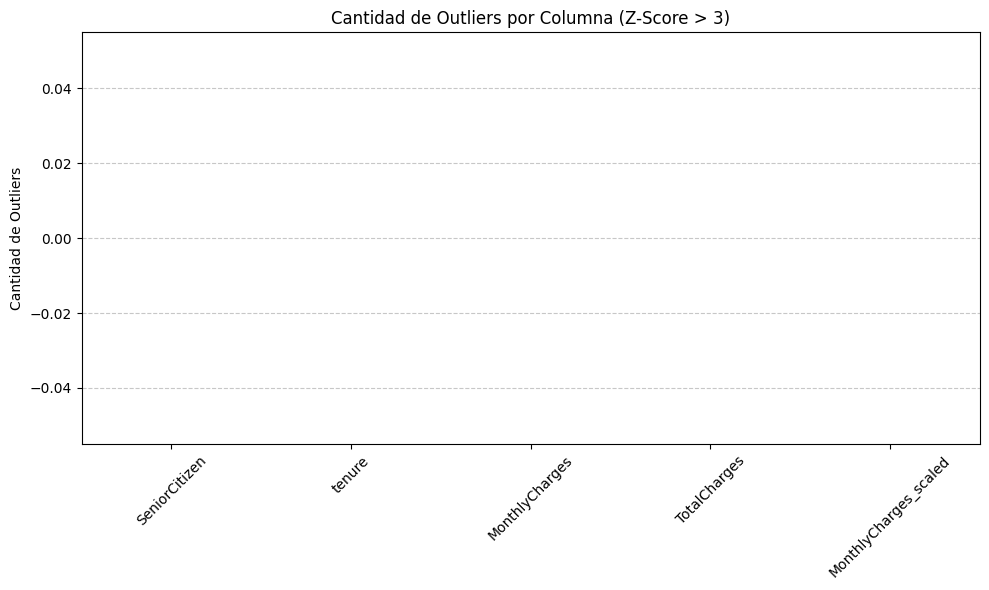

In [14]:
# Filtramos solo las columnas numéricas
numeric_cols = dataSet.select_dtypes(include=['int64', 'float64']).columns

# Calculamos el z-score para todas las columnas numéricas
z_scores = np.abs(zscore(dataSet[numeric_cols]))

# Definimos el umbral para considerar outliers
outliers = z_scores > 3

# Contamos cuántos outliers hay por columna
outlier_counts = outliers.sum(axis=0)

# Mostramos los resultados
outlier_series = pd.Series(outlier_counts, index=numeric_cols)

print("Cantidad de outliers por columna (Z-Score > 3):")
print(outlier_series)

# Gráficamos los outliers
plt.figure(figsize=(10, 6))
outlier_series.plot(kind='bar', color='tomato')
plt.title("Cantidad de Outliers por Columna (Z-Score > 3)")
plt.ylabel("Cantidad de Outliers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Realizamos el porcentaje de permanencia con relación al método de pago.

In [18]:
print(dataSet.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100)


Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


Realizamos el porcentaje de permanencia con relación al tipo de contrato.

In [19]:
print(dataSet.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100)


Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


Realizamos el porcentaje de permanencia con relación al servicio de internet.

In [20]:
print(dataSet.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100)

Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


# Gráficos

Realizamos gráfico correspondiente al Gasto mensual que poseen los clientes.
Podemos notar que la mayoría posee gastos cercanos a los 20$

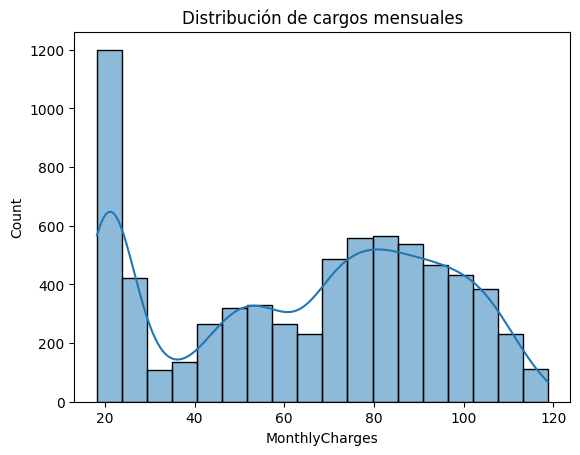

In [13]:
sns.histplot(dataSet['MonthlyCharges'], kde=True)
plt.title('Distribución de cargos mensuales')
plt.show()

Realizamos gráfico correspondiente a la antiguedad (en meses) que poseen los clientes.
Notamos un gran pico de clientes nuevos.

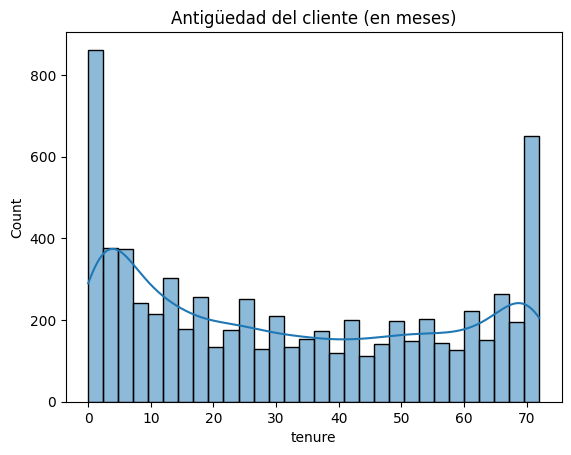

In [9]:
sns.histplot(dataSet['tenure'], bins=30, kde=True)
plt.title('Antigüedad del cliente (en meses)')
plt.show()

Realizamos gráfico correspondiente a la relación que tiene el tipo de contrato con el abandono del cliente.
Notamos que los clientes que abandonan mayormente el servicio son aquellos que realizan gastos gastos mes a mes.

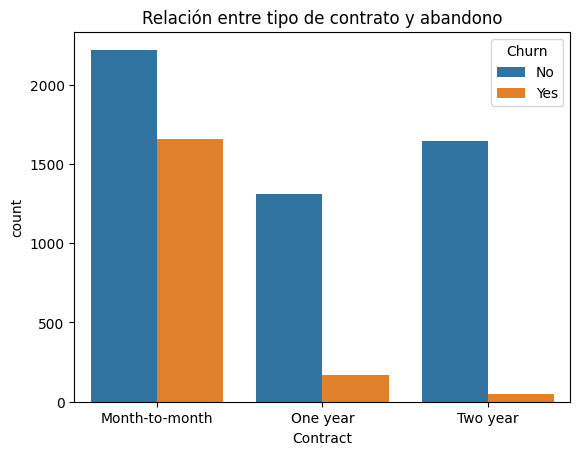

In [11]:
sns.countplot(data=dataSet, x='Contract', hue='Churn')
plt.title('Relación entre tipo de contrato y abandono')
plt.show()


Realizamos gráfico correspondiente a el abandono en relación con el género del cliente.
Notamos que no hay una variación significativa relacionada a la tasa de abandono con respecto al género.

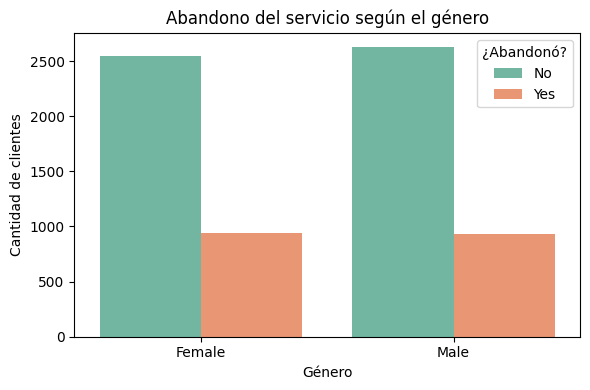

In [35]:
# Gráfico de cantidad de abandonos por género
plt.figure(figsize=(6, 4))
sns.countplot(data=dataSet, x='gender', hue='Churn', palette='Set2')

plt.title("Abandono del servicio según el género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.legend(title="¿Abandonó?")
plt.tight_layout()
plt.show()


Realizamos gráfico correspondiente al gasto mensual en relación a al abandono del cliente.
Notamos que los clientes que abandonaron el servicio son aquellos que poseen tasas de cargo mensual de media a alta.

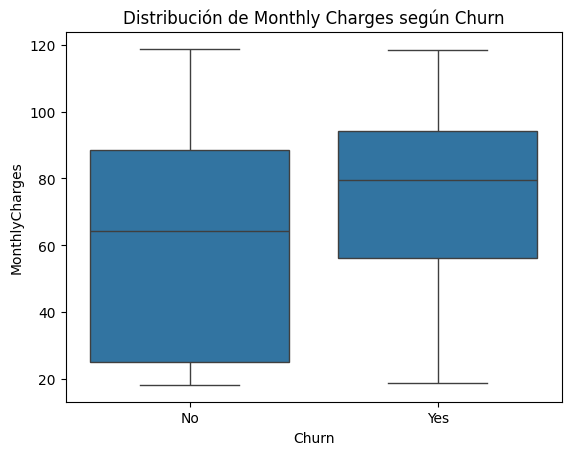

In [40]:
sns.boxplot(data=dataSet, x='Churn', y='MonthlyCharges')
plt.title('Distribución de Monthly Charges según Churn')
plt.show()


Realizamos gráfico correspondiente a la relación entre el abandono y el tipo de servicio contratado

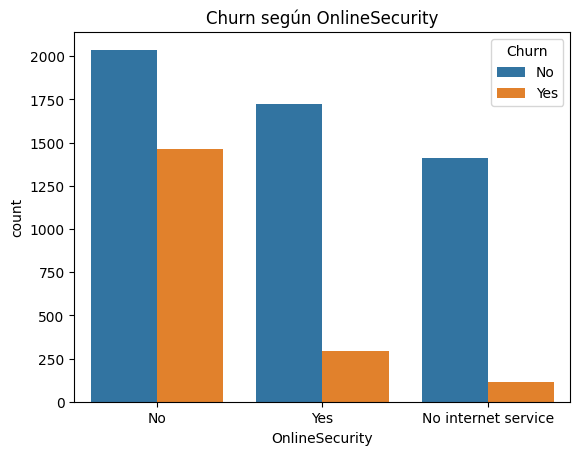

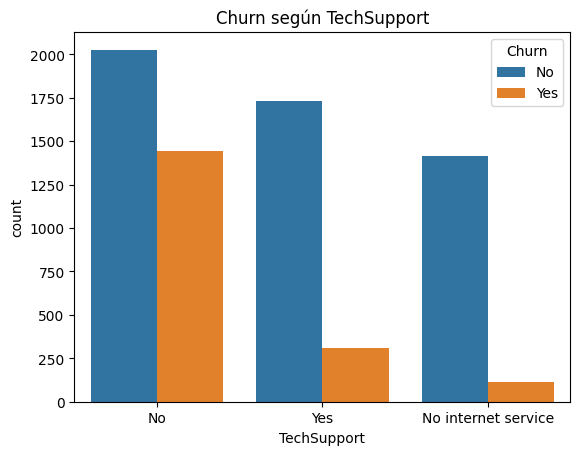

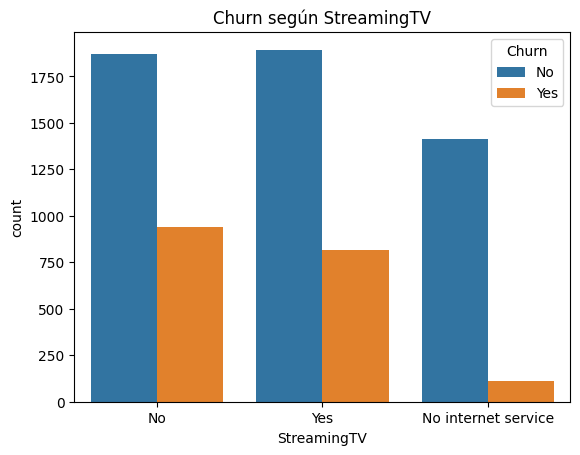

In [15]:
servicios = ['OnlineSecurity', 'TechSupport', 'StreamingTV']
for servicio in servicios:
    sns.countplot(data=dataSet, x=servicio, hue='Churn')
    plt.title(f'Churn según {servicio}')
    plt.show()
